## Car Price Prediction - Multiple Linear Regression

#### Using Car Price Prediction dataset from kaggle, we build a multiple linear regression model.

##### Goal: Approximate the car price given different variables, such as number of doors, fuel type, car body and many others.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df = data.copy()
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Basic scanner

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.size

5330

In [9]:
df.shape

(205, 26)

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:>

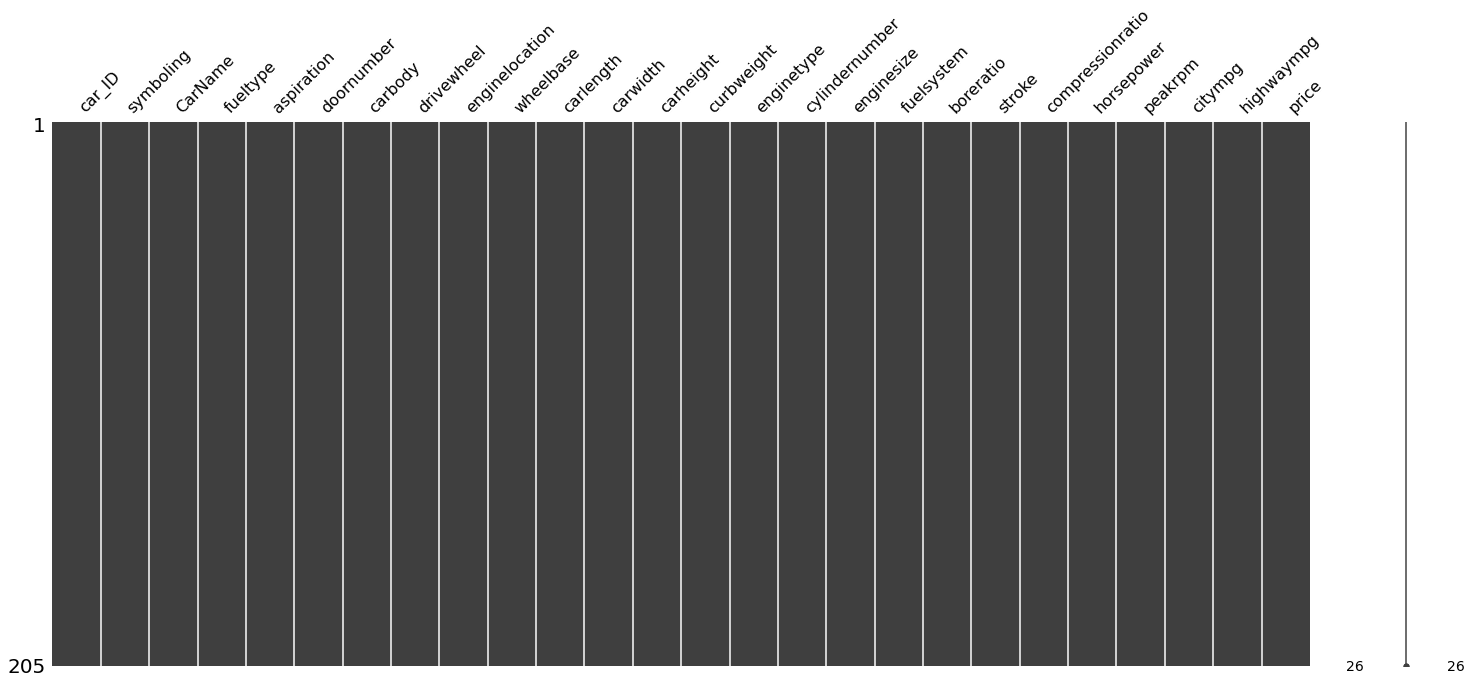

In [11]:
msno.matrix(df)

<AxesSubplot:>

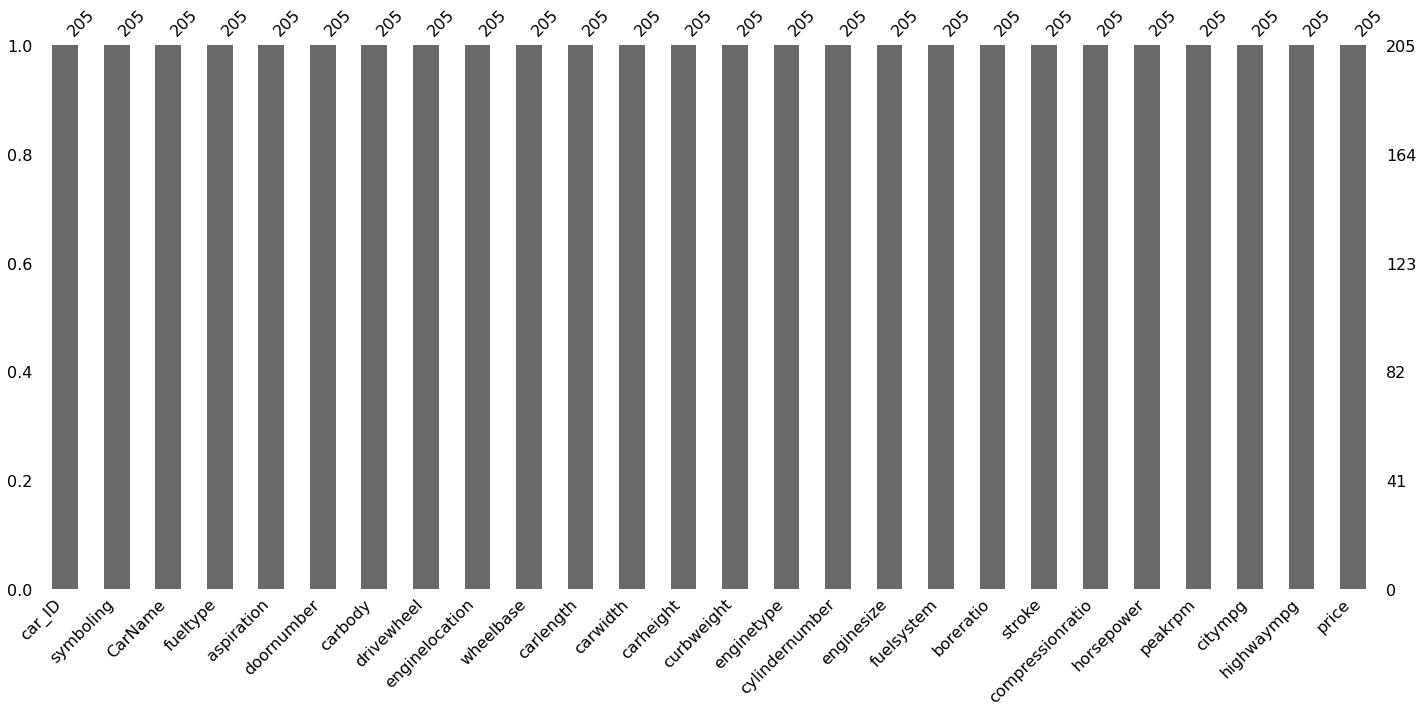

In [12]:
msno.bar(df)

In [13]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Feature engineering

In [14]:
for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

car_ID 205 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling 6 [ 3  1  2  0 -1 -2]
CarName 147 ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'a

In [15]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

* Change some CarNames rows
    'porcshce panamera' = porsche panamera

In [16]:
df['CarName']=df['CarName'].replace({'porcshce panamera' : 'porsche panamera'})

In [17]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [18]:
df=df.drop('car_ID',axis=1)

Split numerical & categorical variables

In [19]:
categorical_columns =df.select_dtypes(include=['object']).columns
numerical_columns =df.select_dtypes(exclude=['object']).columns
df_categorical =df[categorical_columns]
df_numerical =df[numerical_columns]

In [20]:
df_numerical.head(5)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df_categorical.head(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [22]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

numerical = []
categorical = []

for column in df:
  if is_numeric_dtype(df[column]):
    numerical.append(column)
  
  elif is_string_dtype(df[column]):
    categorical.append(column)

print('numerical variables: ', numerical)
print('categorical variables: ', categorical)

numerical variables:  ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
categorical variables:  ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### EDA

Text(0, 0.5, 'Count of Cars')

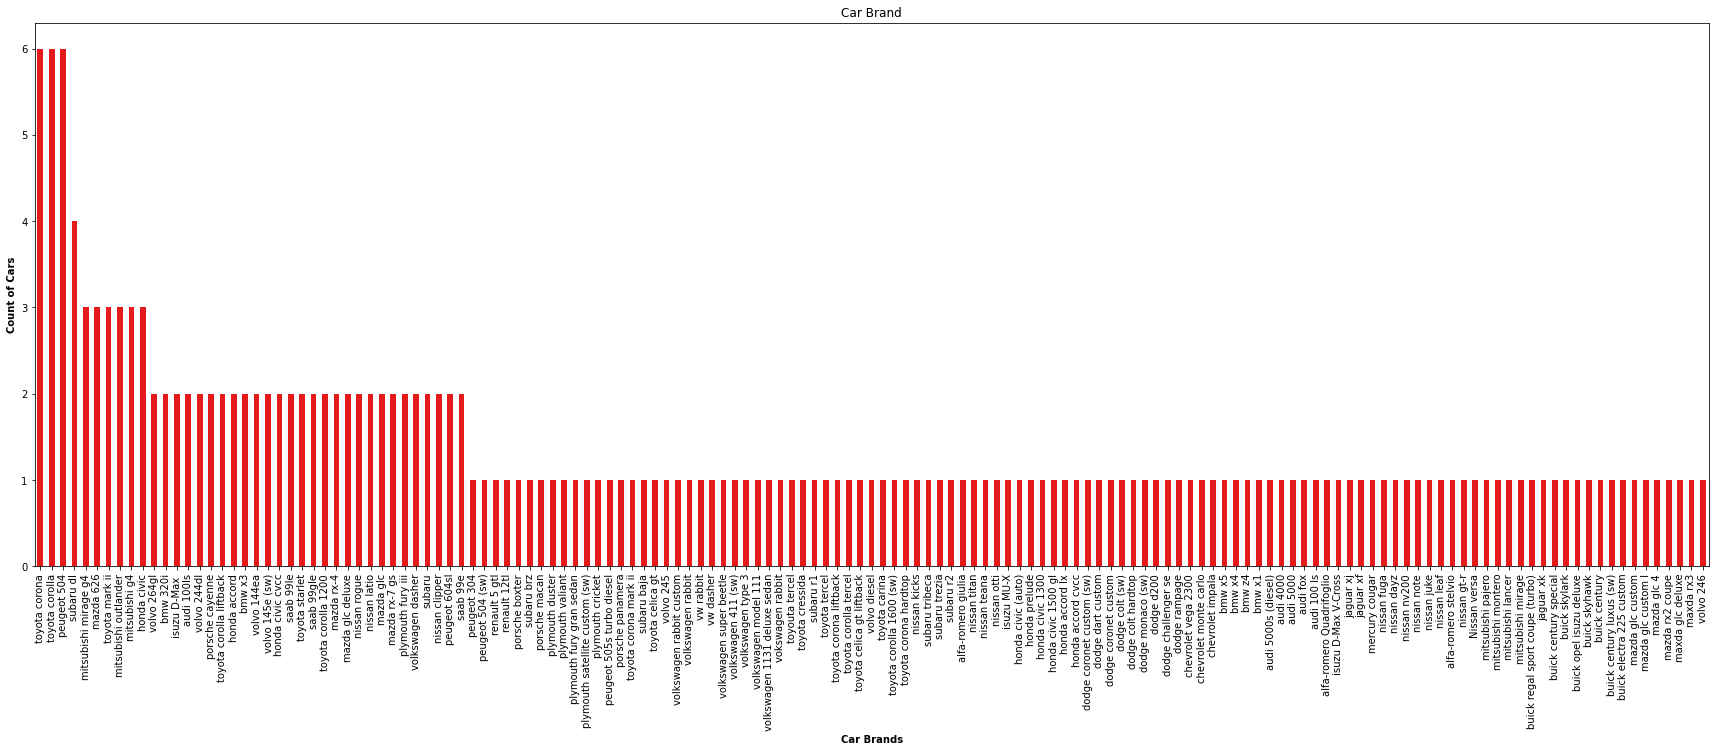

In [23]:
plt.rcParams['figure.figsize']=[30,10]
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True,colormap='Set1')
ax.title.set_text('Car Brand')
plt.xlabel('Car Brands',fontweight='bold')
plt.ylabel('Count of Cars',fontweight='bold')

#### Numerical vs Numerical

<AxesSubplot:>

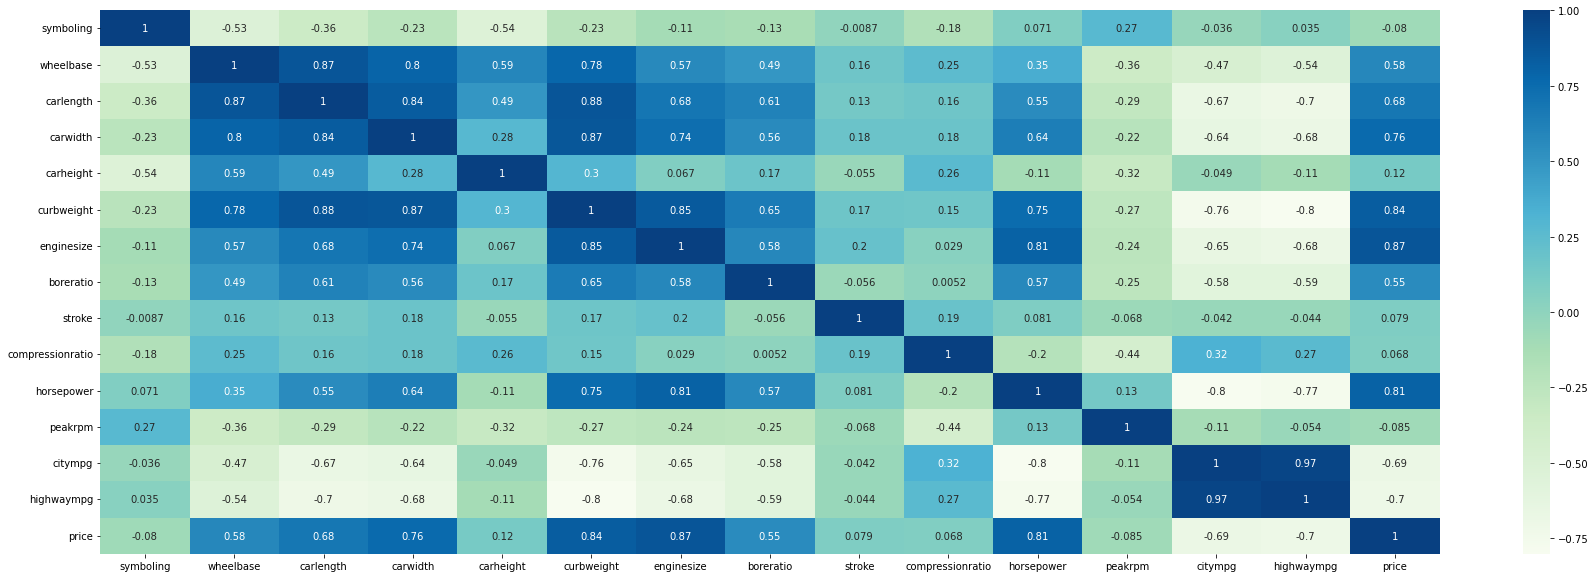

In [24]:
correlation = df.corr()
sns.heatmap(correlation, cmap='GnBu', annot=True)

Carwidth , carlength, curbweight ,enginesize ,horsepowerseems have significant correlation values with price.

Peakrpm, citympg, highwaympg have negative correlation with price 

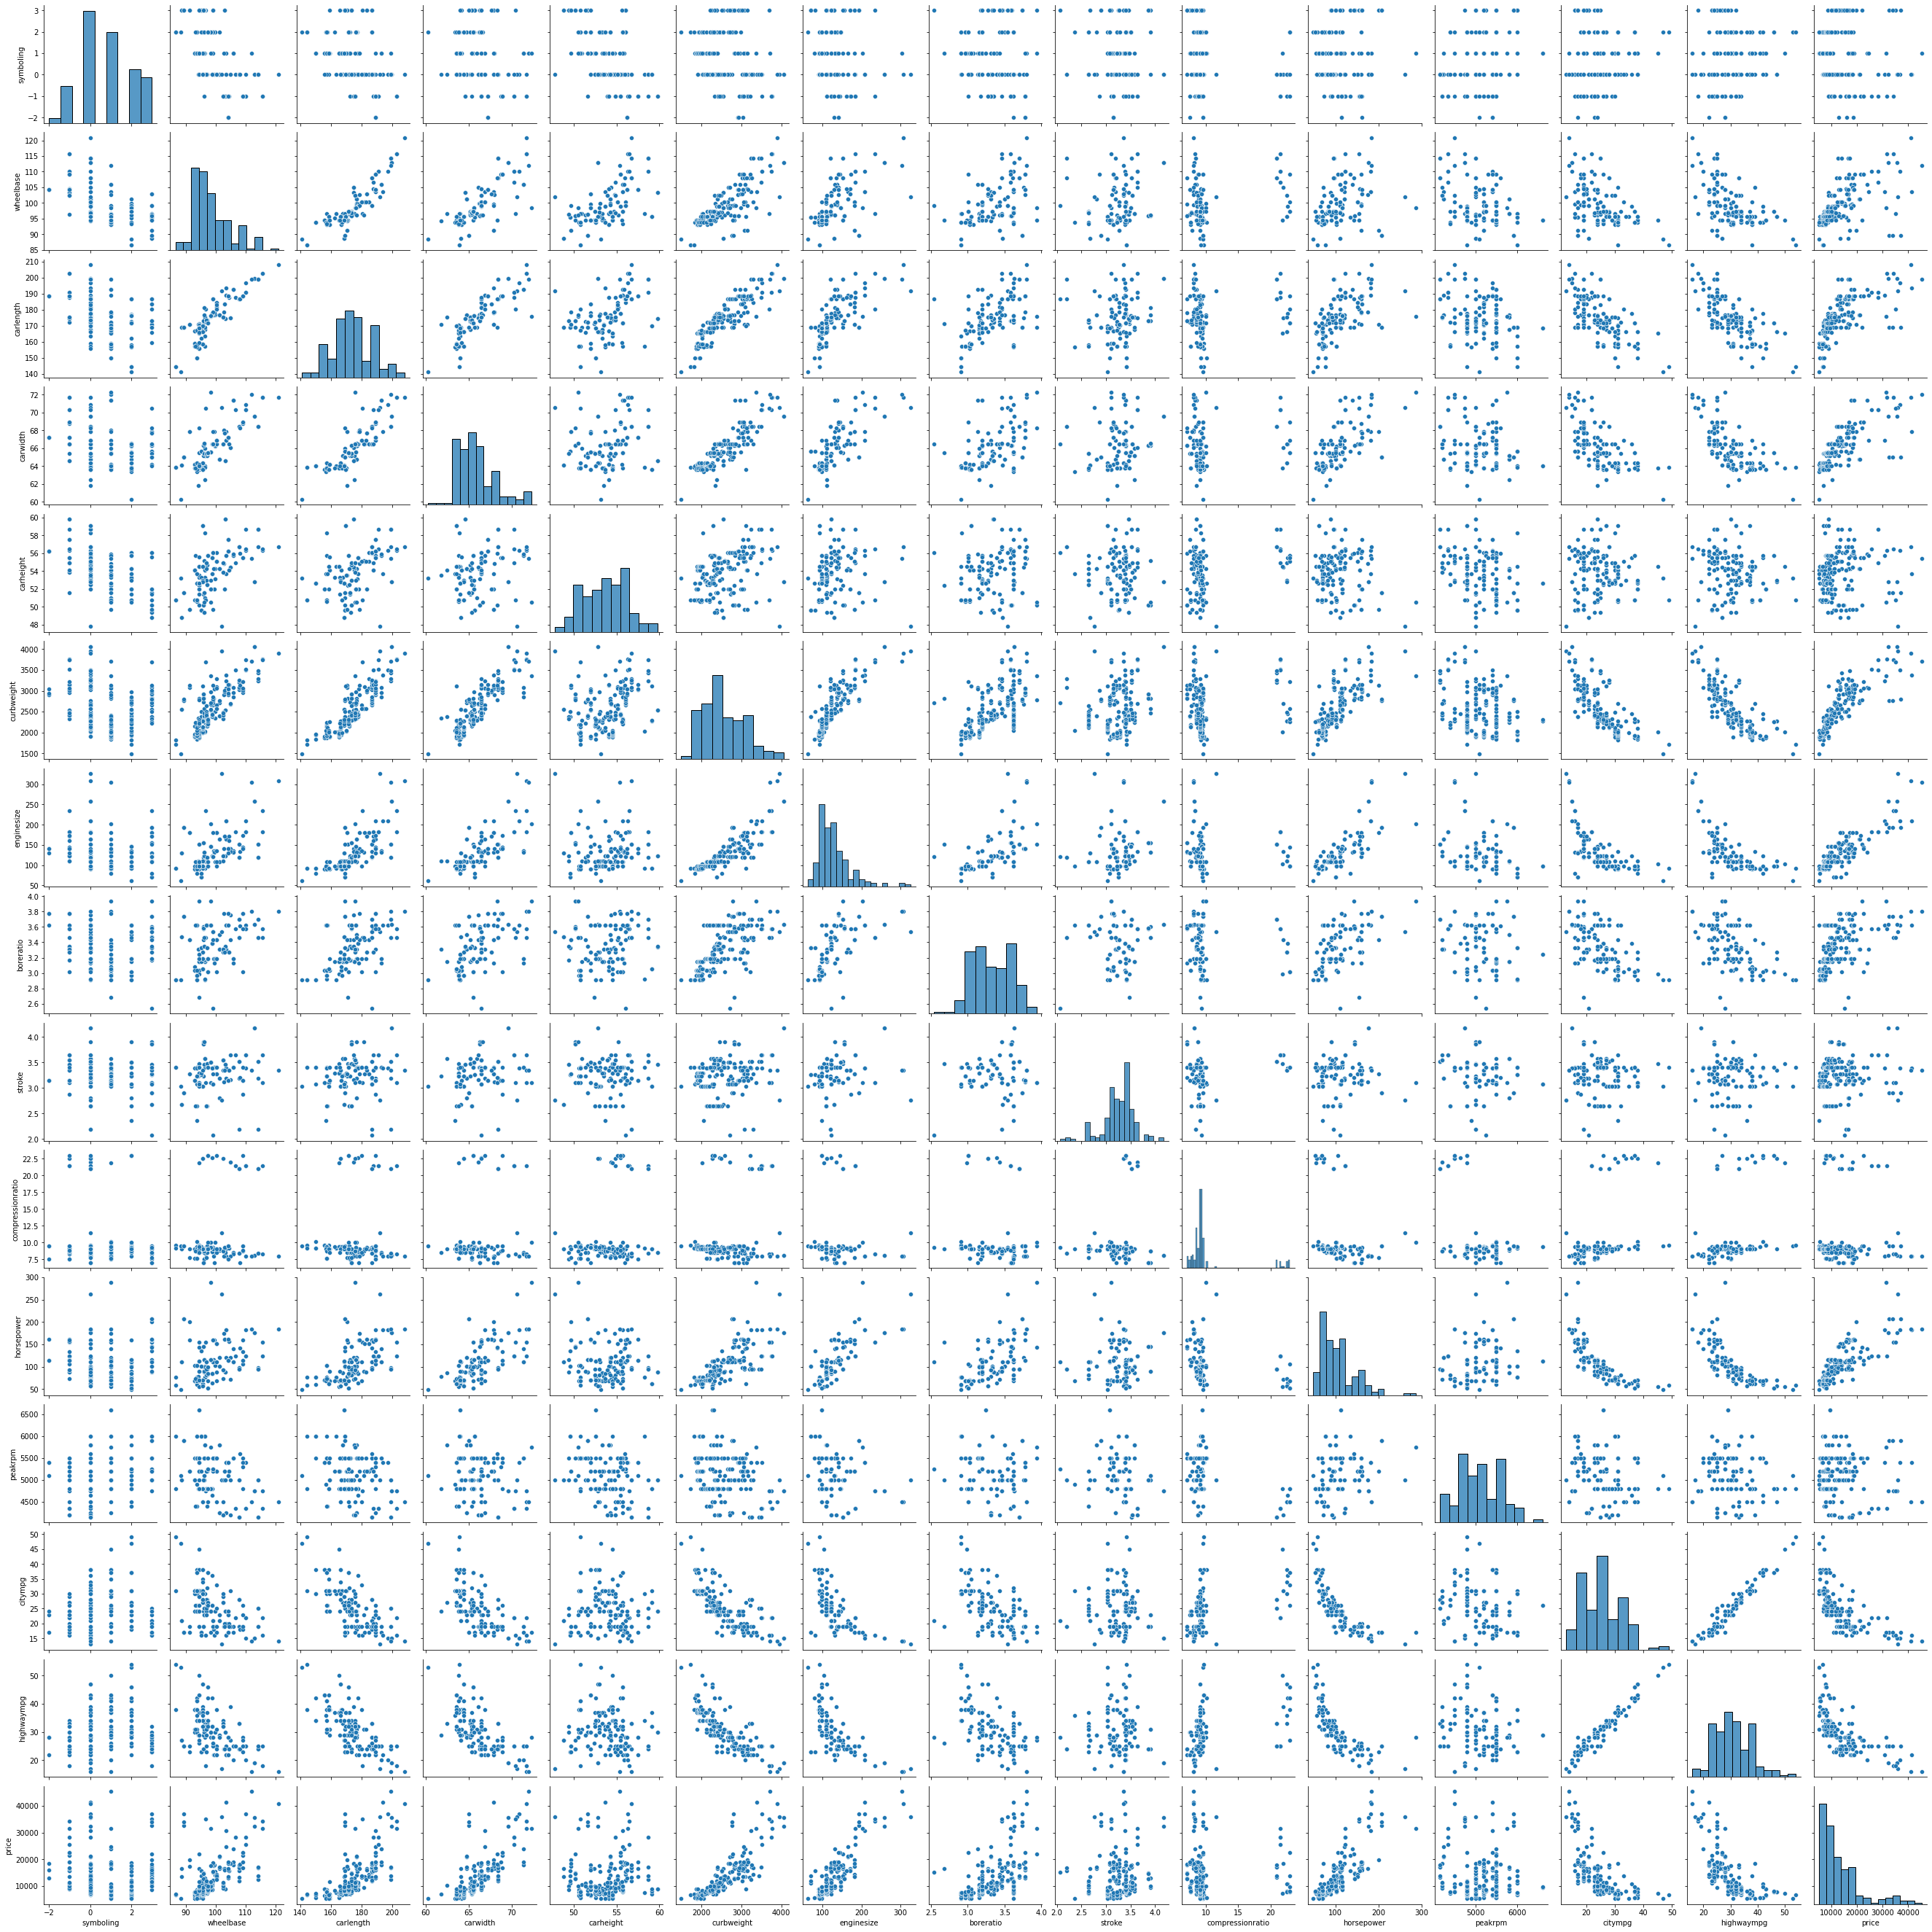

In [25]:
sns.pairplot(df, height=2.5)

/home/aldos/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

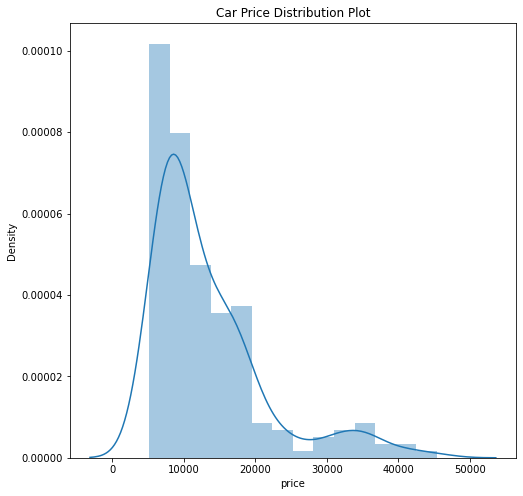

In [26]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

#### Categorical variables

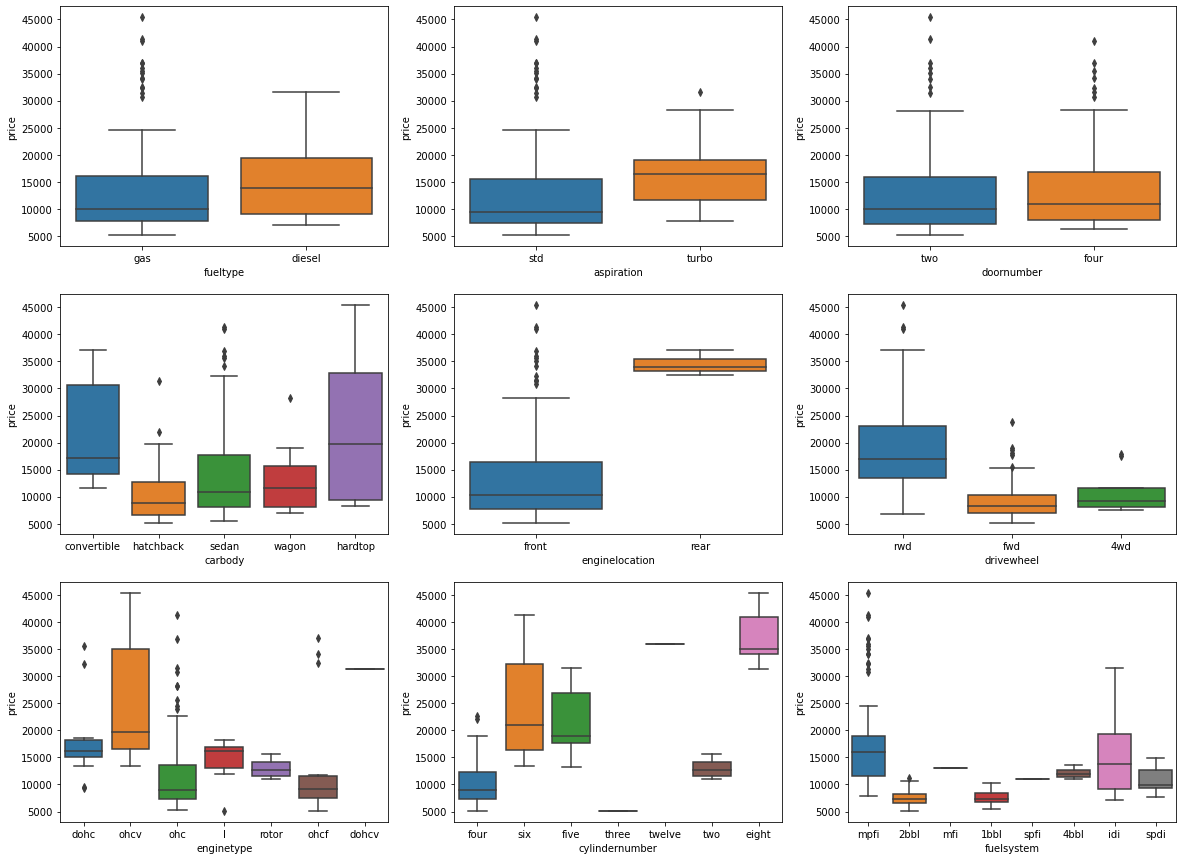

In [27]:
ca=['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
        'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'cylindernumber', 'fuelsystem']
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='fueltype',y='price',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='aspiration',y='price',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='doornumber',y='price',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='enginetype',y='price',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='cylindernumber',y='price',data=df)
plt.subplot(3,3,9)
sns.boxplot(x='fuelsystem',y='price',data=df)
plt.show()

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

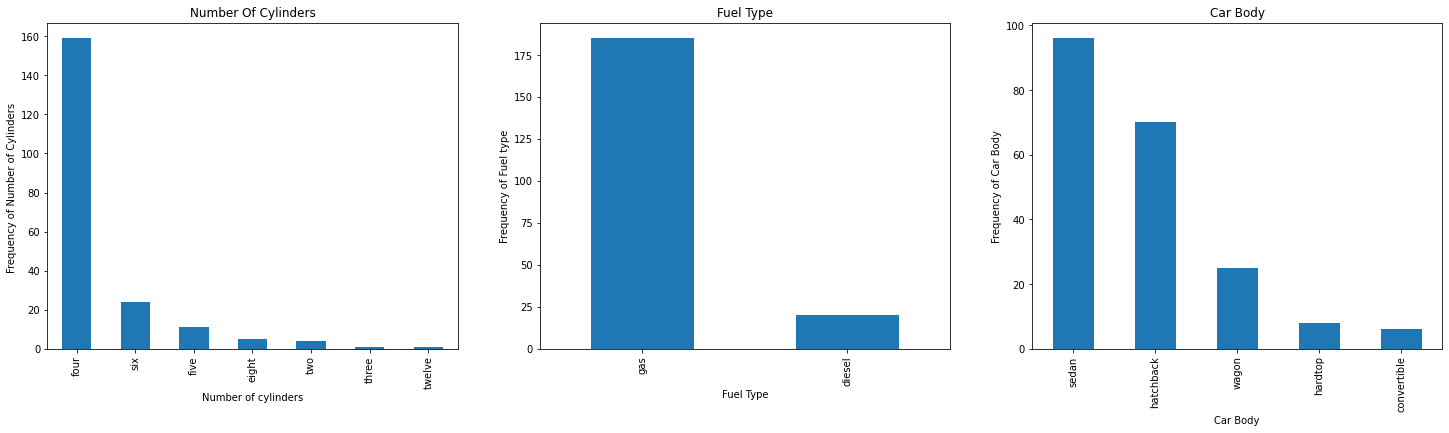

In [28]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number Of Cylinders')
plt1.set(xlabel='Number of cylinders',ylabel='Frequency of Number of Cylinders ')

plt.subplot(1,3,2)
pt2=df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
pt2.set(xlabel='Fuel Type',ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
pt3=df['carbody'].value_counts().plot(kind='bar')
plt.title('Car Body')
pt3.set(xlabel='Car Body',ylabel='Frequency of Car Body')

In [ ]:
df=df.drop('symboling',axis=1)

In [33]:
df=df.drop('CarName',axis=1)

In [34]:
df.head(4)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


### Encoding categorical data

In [52]:
y = df['price'].values

In [60]:
X = df.iloc[: , :-1].values


In [54]:
print(X,y)

[['gas' 'std' 'two' ... 5000 21 27]
 ['gas' 'std' 'two' ... 5000 21 27]
 ['gas' 'std' 'two' ... 5000 19 26]
 ...
 ['gas' 'std' 'four' ... 5500 18 23]
 ['diesel' 'turbo' 'four' ... 4800 26 27]
 ['gas' 'turbo' 'four' ... 5400 19 25]] [13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.   

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

### Encoding Independent Variables

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,11,12,14])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [62]:
X

array([[0.0, 1.0, 1.0, ..., 5000, 21, 27],
       [0.0, 1.0, 1.0, ..., 5000, 21, 27],
       [0.0, 1.0, 1.0, ..., 5000, 19, 26],
       ...,
       [0.0, 1.0, 1.0, ..., 5500, 18, 23],
       [1.0, 0.0, 0.0, ..., 4800, 26, 27],
       [0.0, 1.0, 0.0, ..., 5400, 19, 25]], dtype=object)

### Splitting the dataset into the training set and test set

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Multiple Linear Regression model on the Training set

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the test set results

In [65]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 5942.65  6795.  ]
 [19814.41 15750.  ]
 [15562.25 15250.  ]
 [  353.44  5151.  ]
 [ 9741.24  9995.  ]
 [12601.81 11199.  ]
 [ 6376.6   5389.  ]
 [ 5807.88  7898.  ]
 [17041.58 17199.  ]
 [ 7511.07  6529.  ]
 [20002.72 20970.  ]
 [33969.37 31400.5 ]
 [12732.57 10945.  ]
 [13982.15 18344.  ]
 [ 6790.32  8916.5 ]
 [12408.76  9989.  ]
 [10049.39  9295.  ]
 [19555.19 18920.  ]
 [ 9352.77  7895.  ]
 [ 6600.59  6488.  ]
 [ 9352.16  9959.  ]
 [16518.77 15580.  ]
 [ 9907.46  9895.  ]
 [13151.17 11549.  ]
 [21184.53 15998.  ]
 [ 6968.6   5118.  ]
 [ 7685.83  6938.  ]
 [16014.14 16695.  ]
 [ 7000.12  8358.  ]
 [ 5857.48  5499.  ]
 [ 9640.83  7975.  ]
 [10811.16 12290.  ]
 [17152.38 22018.  ]
 [ 9790.7   8948.  ]
 [ 6232.09  6849.  ]
 [29045.99 41315.  ]
 [12977.9  11595.  ]
 [12400.45 18150.  ]
 [ 5839.57  6377.  ]
 [37626.28 45400.  ]
 [ 6479.48  8916.5 ]]


* Left value: Actual value from de table
* Right value: Approximate value

Clearly we can see that the model gives a very close aproximation to the actual value(in most cases), but the model still can be improved by removing some variables and making some changes to table.